#BAR PLOTS

In [73]:
import seaborn as sbn
diamonds = sbn.load_dataset("diamonds")
data = diamonds.copy()

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [75]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [76]:
dataCat = data.select_dtypes(include=["category"])
dataCat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [77]:
dataCat.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

<Axes: ylabel='cut'>

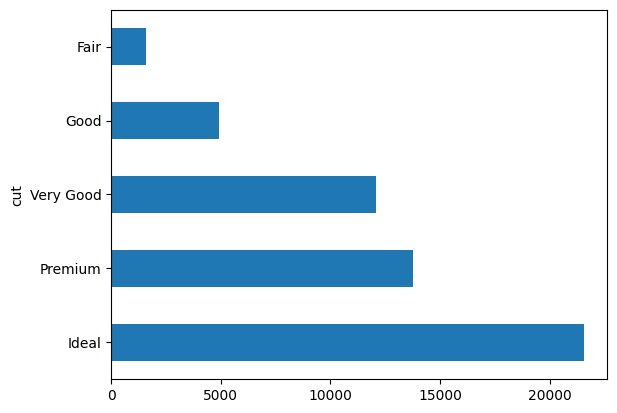

In [78]:
dataCat["cut"].value_counts().plot(kind="barh")

#Categorical variable ordering

In [79]:
from pandas.api.types import CategoricalDtype

cut_rank = ["Fair","Good","Very Good", "Premium", "Ideal"]
dataCat["cut"] = dataCat["cut"].astype(CategoricalDtype(ordered= True, categories= cut_rank))
dataCat["cut"]

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

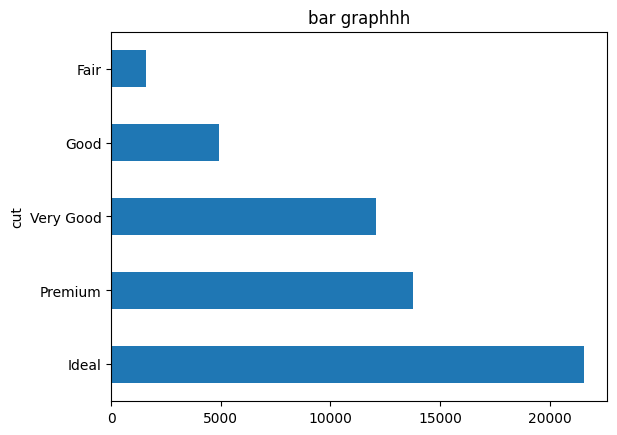

In [80]:
# dataCat.cut.value_counts().plot(kind="barh").set_title("bar graphhh");
(dataCat.cut
 .value_counts()
 .plot(kind="barh")
 .set_title("bar graphhh"));

Text(0.5, 1.0, 'Frequency of cuts')

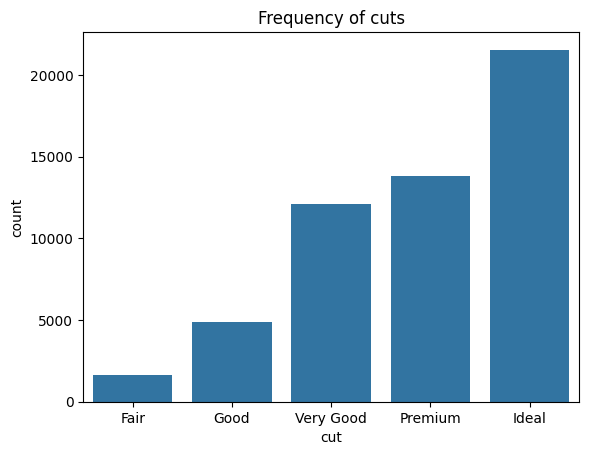

In [94]:
cut_frequencies = dataCat.cut.value_counts().reset_index()
sbn.barplot(x= xx["cut"], y=xx["count"],data= xx).set_title("Frequency of cuts")

#Crossing Bar Plots

In [104]:
data = diamonds.copy()
cdata = data.select_dtypes(include= "category")
cut_rank = ["Fair","Good","Very Good", "Premium", "Ideal"]
data["cut"] = data["cut"].astype(CategoricalDtype(ordered= True, categories= cut_rank))
# frq = cdata.cut.value_counts().reset_index()
# sbn.barplot(x=frq["cut"], y=frq["count"], data= frq)

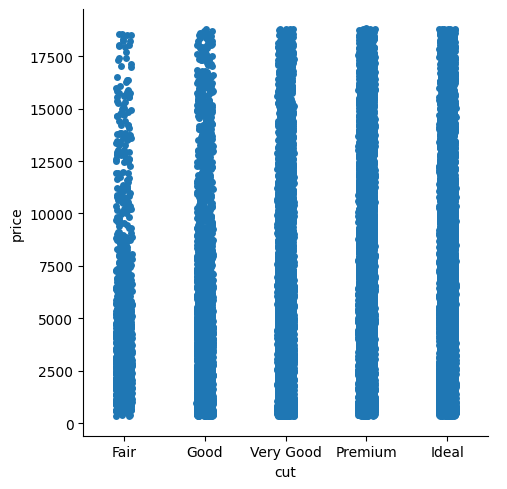

In [105]:
sbn.catplot(x="cut", y="price", data= data)

<Axes: xlabel='cut', ylabel='price'>

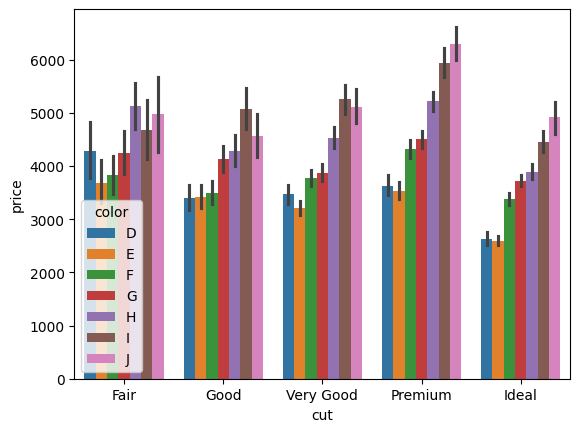

In [110]:
sbn.barplot(x= "cut", y="price", data= data, hue= "color")